In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/clean_ecomm_data.csv")
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

df.head()


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub-category,product_name,sales,order_year,order_month,order_week
0,1,CA-2017-152156,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017.0,8.0,32.0
1,2,CA-2017-152156,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017.0,8.0,32.0
2,3,CA-2017-138688,2017-12-06,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017.0,12.0,49.0
3,4,US-2016-108966,2016-11-10,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016.0,11.0,45.0
4,5,US-2016-108966,2016-11-10,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016.0,11.0,45.0


In [2]:
customer_revenue = df.groupby('customer_id')['sales'].sum()
customer_orders = df.groupby('customer_id')['order_id'].nunique()

clv_df = pd.DataFrame({
    "customer_id": customer_revenue.index,
    "total_revenue": customer_revenue.values,
    "total_orders": customer_orders.values
})

clv_df.head()


,customer_id,total_revenue,total_orders
0,AA-10315,5563.560,5
1,AA-10375,1056.390,9
2,AA-10480,1790.512,4
3,AA-10645,5086.935,6
4,AB-10015,886.156,3


In [3]:
clv_df["avg_order_value"] = clv_df["total_revenue"] / clv_df["total_orders"]


In [4]:
purchase_frequency = clv_df["total_orders"] / clv_df["total_orders"].sum()
clv_df["purchase_frequency"] = purchase_frequency
clv_df.head()


,customer_id,total_revenue,total_orders,avg_order_value,purchase_frequency
0,AA-10315,5563.560,5,1112.712000,0.001016
1,AA-10375,1056.390,9,117.376667,0.001829
2,AA-10480,1790.512,4,447.628000,0.000813
3,AA-10645,5086.935,6,847.822500,0.001219
4,AB-10015,886.156,3,295.385333,0.000610


In [5]:
clv_df["clv"] = clv_df["avg_order_value"] * clv_df["purchase_frequency"] * 12
clv_df.head()


,customer_id,total_revenue,total_orders,avg_order_value,purchase_frequency,clv
0,AA-10315,5563.560,5,1112.712000,0.001016,13.564145
1,AA-10375,1056.390,9,117.376667,0.001829,2.575514
2,AA-10480,1790.512,4,447.628000,0.000813,4.365328
3,AA-10645,5086.935,6,847.822500,0.001219,12.402117
4,AB-10015,886.156,3,295.385333,0.000610,2.160478


In [6]:
clv_df.sort_values(by="clv", ascending=False).head(20)


,customer_id,total_revenue,total_orders,avg_order_value,purchase_frequency,clv
700,SM-20320,25043.050,5,5008.610000,0.001016,61.055790
741,TC-20980,19052.218,5,3810.443600,0.001016,46.449942
621,RB-19360,15117.339,6,2519.556500,0.001219,36.856576
730,TA-21385,14595.620,4,3648.905000,0.000813,35.584608
6,AB-10105,14473.571,10,1447.357100,0.002032,35.287048
434,KL-16645,14175.229,12,1181.269083,0.002438,34.559681
669,SC-20095,14142.334,9,1571.370444,0.001829,34.479482
327,HL-15040,12873.298,6,2145.549667,0.001219,31.385529
683,SE-20110,12209.438,11,1109.948909,0.002235,29.767017
131,CC-12370,12129.072,5,2425.814400,0.001016,29.571082


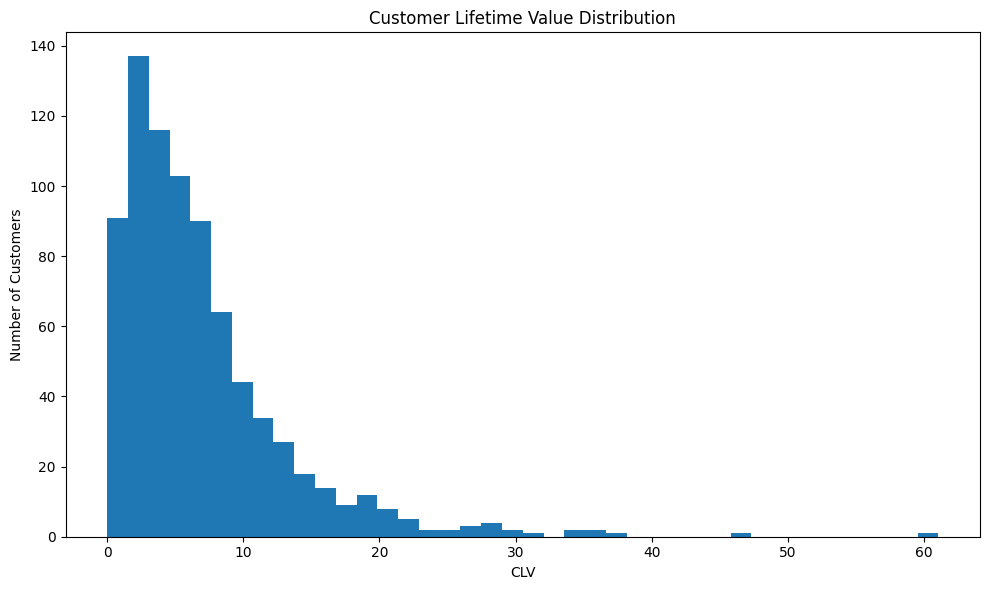

In [7]:
plt.figure(figsize=(10,6))
plt.hist(clv_df['clv'], bins=40)
plt.title("Customer Lifetime Value Distribution")
plt.xlabel("CLV")
plt.ylabel("Number of Customers")
plt.tight_layout()

import os
os.makedirs("../images", exist_ok=True)
plt.savefig("../images/clv_distribution.png")

plt.show()


In [8]:
os.makedirs("../reports", exist_ok=True)
clv_df.to_csv("../reports/customer_clv.csv", index=False)
